In [54]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
import datetime

import matplotlib.pylab as plt
import os

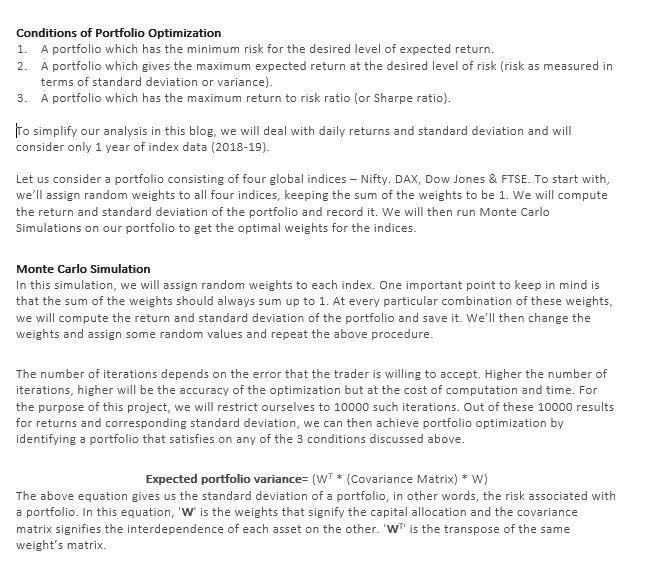

In [ ]:
data=pd.read_excel(r"G:\Documents\Documents\Finance work\MC test.xlsx",index_col=0)
data.index = pd.to_datetime(data.index)

In [40]:
wt=np.array([0.25,0.3,0.3,0.15])

In [41]:
ret=data.pct_change()

In [42]:
cov_matrix=ret.cov()

In [43]:
n=[-0.002,0.003,-0.0002,0.004]

In [44]:
cov_matrix

,Nifty,Dow,Dax,FTSE
Nifty,0.005738,-0.000596,-0.000974,-0.000933
Dow,-0.000596,0.017971,-0.000511,-0.001371
Dax,-0.000974,-0.000511,0.016428,0.001402
FTSE,-0.000933,-0.001371,0.001402,0.030052


In [45]:
avg_ret=ret.mean()

In [46]:
avg_ret

Nifty    0.002774
Dow      0.008242
Dax      0.007737
FTSE     0.014274
dtype: float64

In [47]:
port_mean=avg_ret.dot(wt)


In [48]:
port_std=np.sqrt(np.dot(wt.T,np.dot(cov_matrix,wt)))

In [49]:
#Set the number of iterations to 10000 and define an array to hold the simulation results; initially set to all zeros
stock=data.columns
num_iterations = 10000
#matrix([row,col] for 7 rows and 10000 cols (simulation results))
simulation_res = np.zeros((4+len(stock)-1,num_iterations))

In [50]:
for i in range(num_iterations):
#Select random weights and normalize to set the sum to 1
        weights = np.array(np.random.random(4))
        weights /= np.sum(weights)
        #Calculate the return and standard deviation for every step
        port_return=np.dot(avg_ret,weights)
        port_vol=np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
        #Store all the results in a defined array
        simulation_res[0,i] = port_return
        simulation_res[1,i] = port_vol
        #Sharpe ratio 
        simulation_res[2,i] = simulation_res[0,i] / simulation_res[1,i]
        #save the weights for each stock in below rows
        for j in range(len(weights)):
                simulation_res[j+3,i] = weights[j]

In [51]:
sim_frame = pd.DataFrame(simulation_res.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3]])
print (sim_frame.head (5))
print (sim_frame.tail (5))

        ret     stdev    sharpe     Nifty       Dow       Dax      FTSE
0  0.009107  0.077327  0.117769  0.248321  0.108958  0.253032  0.389689
1  0.009432  0.077619  0.121512  0.077690  0.412362  0.223522  0.286426
2  0.006976  0.057633  0.121047  0.321976  0.294995  0.277703  0.105326
3  0.006024  0.058804  0.102439  0.439777  0.111669  0.385340  0.063214
4  0.005099  0.053821  0.094735  0.576975  0.201183  0.202913  0.018930
           ret     stdev    sharpe     Nifty       Dow       Dax      FTSE
9995  0.009382  0.083523  0.112326  0.239002  0.065745  0.267220  0.428033
9996  0.009410  0.091805  0.102499  0.339921  0.038238  0.110771  0.511071
9997  0.008168  0.063871  0.127886  0.216114  0.267892  0.306592  0.209402
9998  0.008016  0.070618  0.113512  0.391588  0.033888  0.237134  0.337390
9999  0.007971  0.064957  0.122707  0.308290  0.112282  0.318272  0.261156


In [52]:
#Spot the position of the portfolio with highest Sharpe Ratio
max_sharpe = sim_frame.iloc[sim_frame['sharpe'].idxmax()]
#Spot the position of the portfolio with minimum Standard Deviation
min_std = sim_frame.iloc[sim_frame['stdev'].idxmin()]
print ("The portfolio for max Sharpe Ratio:\n", max_sharpe)
print ("The portfolio for min risk:\n", min_std)

The portfolio for max Sharpe Ratio:
 ret       0.007716
stdev     0.058820
sharpe    0.131178
Nifty     0.320243
Dow       0.229128
Dax       0.228380
FTSE      0.222249
Name: 1913, dtype: float64
The portfolio for min risk:
 ret       0.005867
stdev     0.051487
sharpe    0.113943
Nifty     0.538282
Dow       0.171686
Dax       0.180739
FTSE      0.109293
Name: 5488, dtype: float64


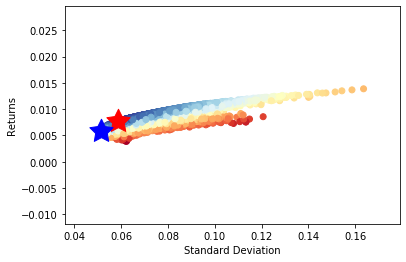

In [53]:
#Create a scatter plot coloured by various Sharpe Ratios with standard deviation on the x-axis and returns on the y-axis
plt.scatter(sim_frame.stdev,sim_frame.ret,c=sim_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
#plt.ylim(0,.003)
#plt.xlim(0.0075,0.012)
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='r',s=600)
#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(min_std[1],min_std[0],marker=(5,1,0),color='b',s=600)
plt.show()